# 출처:  도서 <Do it! 판다스 입문>  다니엘 첸 저
### (학습 데이터 자료 다운로드 : http://github.com/easyslT/doit_pandas) 


## 판다스 실습3
## 그래프 그리기

## 앤스콤 데이터 집합 불러온 후 그래프 그리기

데이터 시각화를 보여주는 전형적인 사례로 앤스콤 4분할 그래프(Anscombe’s quartet)가 있다. 이 그래프는 영국의 프랭크 앤스콤(Frank Anscombe)이 데이터를 시각화하지 않고 수치만 확인할 때 발생할 수 있는 함정을 보여주기 위해 만든 그래프다. 그러면 앤스콤이 지적한 ‘함정’이란 무엇일까?
앤스콤이 지적한 함정과 데이터 시각화의 필요성 : 앤스콤 4분할 그래프를 구성하는 데이터 집합은 4개의 그룹으로 구성되어 있으며 모든 데 이터 그룹은 x, y 열을 가지고 있다. 그런데 이 4개의 데이터 그룹은 각각 평균, 분산과 같은 수칫값이나 상관관계, 회귀선이 같다는 특징이 있다. 그래서 이런 결과만 보고 ‘데이터 그룹 I, II, III, IV의 데이터는 모두 같을 것이다’라고 착각할 수 있다. 바로 이 것이 앤스콤이 지적한 ‘함정’이다. 하지만 각 데이터 그룹을 시각화하면 데이터 그룹이 서로 다른 데이터 패턴을 가지고 있다는 점을 금방 알 수 있다. 이런 점에서 데이터 시각화는 데이터 분석 분야에서 아주 중요한 요소라고 할 수 있다

### 1. 앤스콤 데이터 집합 불러오기

앤스콤 데이터 집합은 seaborn 라이브러리에 포함되어 있다. seaborn 라이브러리의 load_dataset 메서드에 문자열 anscombe을 전달하면 앤스콤 데이터 집합을 불러올 수 있다. 이때 데이터프레임의 열 이름 중 dataset 열이 데이터 그룹을 구분한다는 것을 알 수 있다.

In [48]:
import seaborn as sns 
anscombe = sns.load_dataset("anscombe") 
print(anscombe)
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

데이터 집합이 준비되었으면 이제 그래프로 시각화를 하면 된다. 그래프를 그리기 위해 matplotlib 라이브러리를 사용한다. 먼저 그래프를 그리기 위해 matplotlib 라이브러리를 불러오자.

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

다음은 anscombe 데이터프레임의 dataset 열에서 데이터 값이 I인 것만 추출한 것이다. 즉, 첫 번째 데이터 그룹을 추출한 것이다.

In [50]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']

선 그래프는 plot 메서드로 그릴 수 있다. plot 메서드에 X, y축 데이터를 전달하면 선 그래프가 나타난다. 앞에서 준비한 dataset_l의 x, y 열을 전달하자.

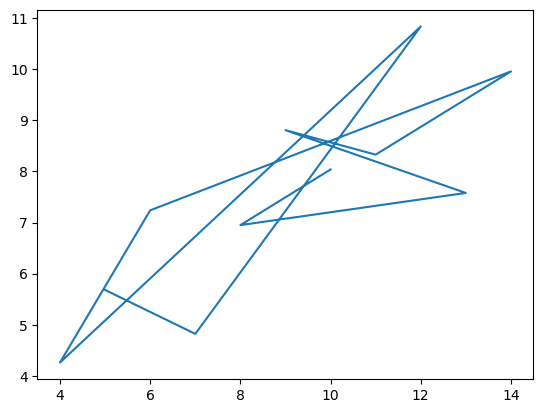

In [51]:
plt.plot(dataset_1['x'], dataset_1['y'])

plot 메서드는 기본적으로 선으로 그래프를 그린다. 만약 점으로 그래프를 그리려면 o를 세번째 인자로 전달하면 된다.

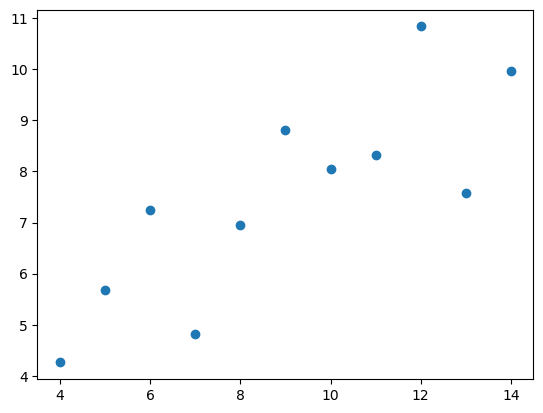

In [52]:
plt.plot(dataset_1['x'], dataset_1['y'], 'o')

### matplotlib 라이브러리로 그래프 그리기

이번에 소개할 내용은 matplotlib 라이브러리로 그래프를 그리는 방법’이다. 아래에 정리한 과정을 잘 읽어보면 블록을 조립하는 과정과 비슷하다는 것을 알 수 있을 것이다.
1. 전체 그래프가 위치할 기본 틀을 만든다.
2. 그래프를 그려 넣을 그래프 격자를 만든다.
3. 그런 다음 격자에 그래프를 하나씩 추가한다. 격자에 그래프가 추가되는 순서는 왼쪽에서 오른쪽 방향이다.
4. 만약 격자의 첫 번째 행이 꽉 차면 두 번째 행에 그래프를 그려 넣는다.

즉, 이후 실습에서 앤스콤 데이터 집합으로 그리게 될 그래프의 격자 크기는 4이고 세 번째 그래프의 경우 2행 1열 위치에 그려진다.

앤스콤 데이터프레임의 dataset 열의 값이 I, II, III, IV인 것을 불린 추출하여 dataset_l, 2, 3, 4에 저장한다.

In [53]:
dataset_2 = anscombe[anscombe['dataset'] == 'II'] 
dataset_3 = anscombe[anscombe['dataset'] == 'III'] 
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

먼저 그래프 격자가 위치할 기본 틀을 만든다.
그런 다음 add_subplot 메서드로 그래프 격자를 그린다다. 기본 틀(fig)에 격자를 추가 한다는 기분으로 add_subplot 메서드를 사용하면 된다. add_subplot의 첫 번째 인자에는 그래프 기본틀의 행 크기를, 두 번째 인자에는 그래프 기본 틀의 열 크기를 지정한다.

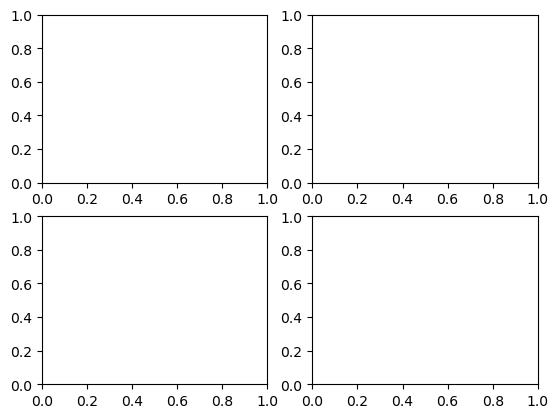

In [54]:
fig = plt.figure()
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

이제 plot 메서드에 데이터를 전달하여 그래프를 그리면 된다. 이번에는 점으로 그래프를 표현했다. 그래프를 확인하려면 fig를 반드시 입력해야 한다.

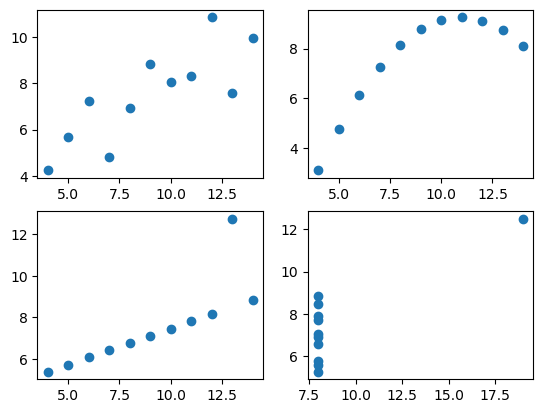

In [55]:
axes1.plot(dataset_1['x'], dataset_1['y'], 'o') 
axes2.plot(dataset_2['x'], dataset_2['y'], 'o') 
axes3.plot(dataset_3['x'], dataset_3['y'], 'o') 
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

fig

각각의 그래프를 쉽게 구분할 수 있도록 그래프 격자에 제목을 추가해 보자. set_title 메서드로 그래프 이름을 전달하면 그래프 격자에 제목이 추가된다.

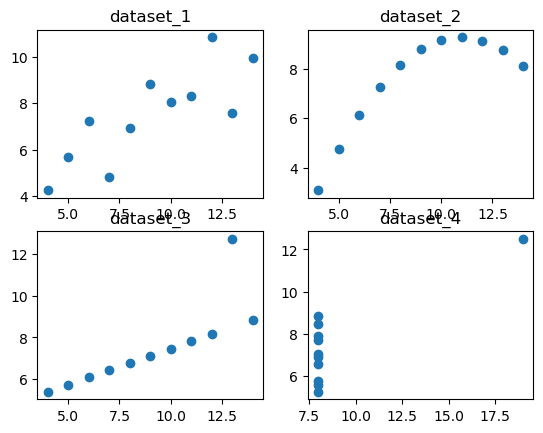

In [56]:
axes1.set_title("dataset_1") 
axes2.set_title("dataset_2")
axes3.set_title("dataset_3") 
axes4.set_title("dataset_4")

fig

기본 틀(fig)에도 제목을 추가해 보자. 기본 틀에 제목을 추가하려면 suptitle 메서드 를 사용하면 된다.

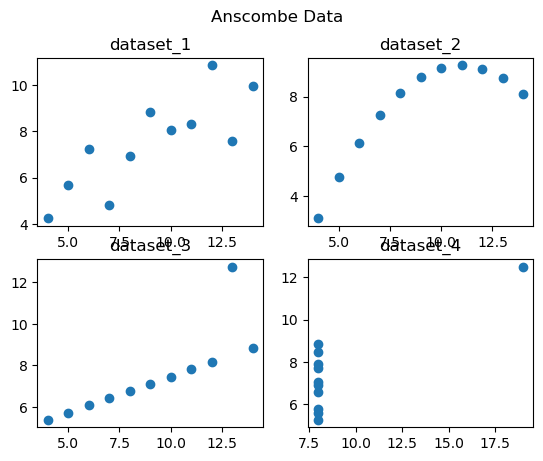

In [57]:
fig.suptitle("Anscombe Data")

fig

그런데 위 과정의 그래프를 보면 각 그래프의 이름과 숫자가 겹쳐 보인다. 이런 경 우에는 tightJayout 메서드를 호출하여 각 그래프의 레이아웃을 조절할 수 있다.

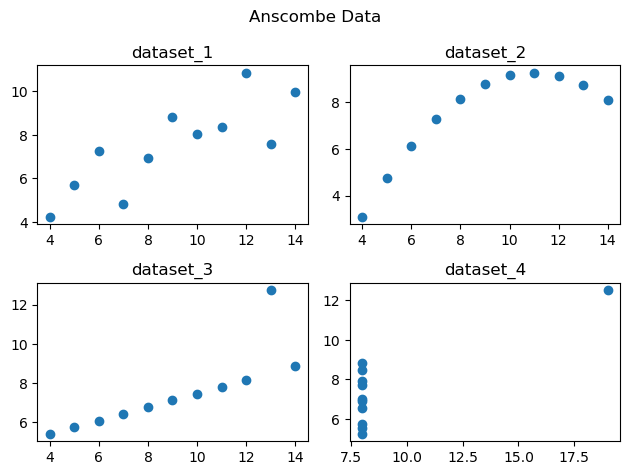

In [58]:
fig.tight_layout()

fig

평균, 분산, 상관관계, 회귀선의 통계 수치가 같아도 그래프의 형태는 다를 수 있다. 앤스콤 4분할 그래프는 데이터 분석 시 수치에만 의존하면 잘못된 판단을 할 수 있다는 것을 알려주는 좋은 예시다.

## 기초 그래프 그리기 ― 히스토그램, 산점도, 박스 그래프

앤스콤 4분할 그래프를 그릴 때 제목을 추가하기 위해 set_title 메서드를 사용 했던 것을 기억하는가? 이 밖에도 matplotlib 라이브러리에는 그래프를 그리기 위한 다양한 메서드가 준비되어 있다. 더불어 고급 그래프 라이브러리인 seaborn 라이브러리도 함께 알아보자.

seaborn 라이브러 리에는 tips라는 데이터 집합이 있다. tips 데이터 집합은 어떤 식당 에서 팁을 지불한 손님의 정보를 모아둔 것이다. 이번 실습에서는 tips 데이터 집합을 사용해 다양한 그래프를 그려보자.

tips 데이터 집합을 불러와 변수 tips에 저장하자. tips 데이터 프레임은 지불금액 , 팁 , 성별, 흡연 유무, 요일, 시간, 전체 인원 정보를 담고 있다.

In [59]:
tips = sns.load_dataset("tips") 
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


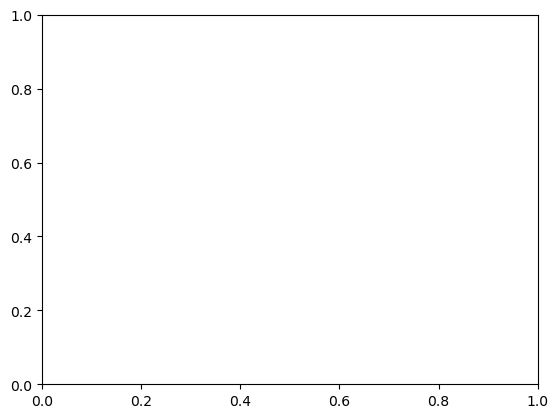

In [60]:
fig = plt.figure() 
axes1 = fig.add_subplot(1, 1, 1) 

히스토그램은 데이터프레임의 열 데이터 분포와 빈도를 살펴보는 용도로 자주 사용하는 그래프다. 이때 데이터프레임의 total_bill, tip 등의 열을 변수라고 부르기도 한다. 그리고 변수를 하나만 사용해서 그린 그래프를 ‘일변량 그래프’라고 부른다.
기본 틀(fig)을 마련하고 그래프 격자(axesl)를 구성하는 것까지는 앞에서 진행한 실습과 동일하다.

hist 메서드에 total_bill 열을 전달하면 히스토그램이 만들어 진다. 이 때 x축의 간격은 bins 인잣값으로 조정할 수 있다. bins 인잣값을 10으로 지 정하면 x축의 간격을 10으 로 조정할 수 있다. 나머지는 그래프의 제목과 x, y축의 제목을 추가하는 코드다.

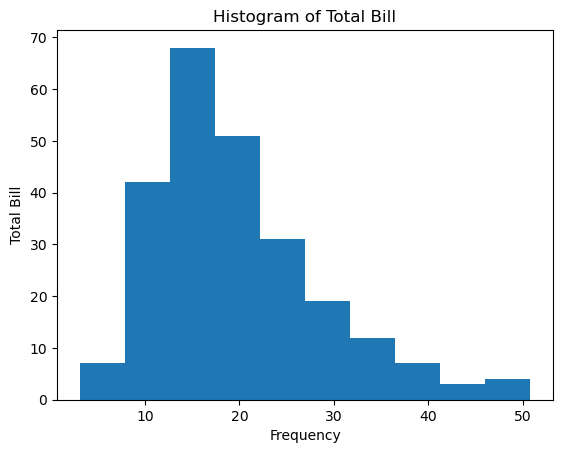

In [61]:
axes1.hist(tips['total_bill'], bins=10) 
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency') 
axes1.set_ylabel('Total Bill') 

fig

이번에는 산점도 그래프를 그려보자. 산점도 그래프는 변수 2개를 사용해서 만드는 그래프이며 변수 2개를 사용하기 때문에 통계 용어로 ‘이 변량 그래프’라고 부른다. 다음은 total_bill 열에 따른 tip 열의 분포를 나타낸 산점도 그래프다.
기본 틀과 그래프 격자를 만들고 scatter 메서드에 total_bill, tips 열을 전달하면 산점도 그래프가 나타난다.

Text(0, 0.5, 'Tip')

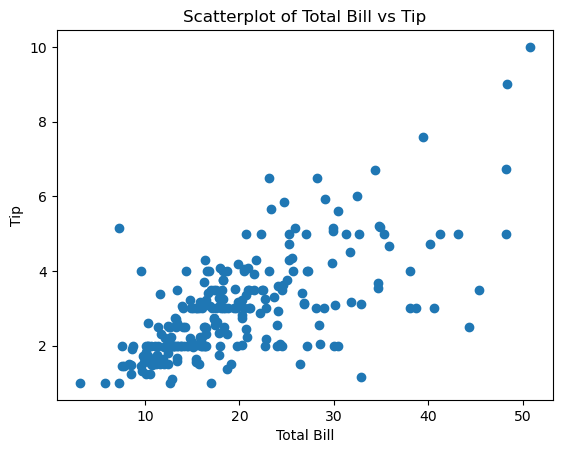

In [62]:
scatter_plot = plt.figure() 
axes1 = scatter_plot.add_subplot(1, 1, 1) 
axes1.scatter(tips['total_bill'], tips['tip']) 
axes1.set_title('Scatterplot of Total Bill vs Tip') 
axes1.set_xlabel('Total Bill') 
axes1.set_ylabel('Tip')

이번에는 박스 그래프를 그려보자. 박스 그래프는 이산형 변수와 연속형 변수를 함께 사용하는 그래프이다. 이산형 변수란 Female, Male과 같이 명확하게 구분되는 값을 의미하고, 연속형 변수란 Tip과 같이 명확하게 셀 수 없는 범위의 값을 의미한다.
boxplot 메서드를 사용하면 박스 그래프를 그릴 수 있다. boxplot 메서드의 첫번째 인자로 전달하는 값이 조금 복잡해 보이긴 한다. tips 데이터프레임에서 성별이 Female인 데이터와 Male인 데이터에서 tip 열 데이터만 추출하여 리스트에 담아 전달한 것이다. 두번째 인자에는 labels 인잣값으로 성별을 구분하기 위한 이름을 추가한다.

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

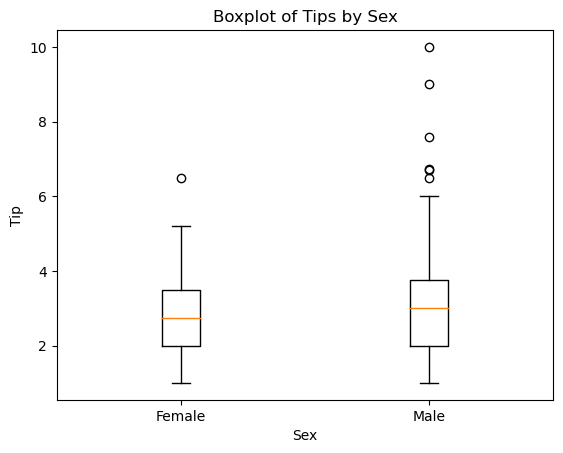

In [63]:
boxplot = plt.figure() 
axes1 = boxplot.add_subplot(1, 1, 1) 

axes1.boxplot( 
    [tips[tips['sex'] == 'Female']['tip'], 
     tips[tips['sex'] == 'Male']['tip']], 
    labels=['Female', 'Male'])


axes1.set_xlabel('Sex') 
axes1.set_ylabel('Tip') 
axes1.set_title('Boxplot of Tips by Sex')

## 다변량 데이터로 다변량 그래프 그리기 ─ 산점도 그래프

앞에서 2개의 변수를 사용한 그래프를 이변량 그래프라고 했다. 그러면 3개 이상의 변수를 사용한 그래프는 무엇이라고 할까? 바로 ‘다변량 그래프’라고 부른다. 그러면 다변량 그래프가 왜 필요할까? 이번에는 다변량 그래프가 왜 필요한지 알아보자.
앞에서는 지불 금액(total_bill)과 팁(tip)만을 사용하여 산점도 그래프를 그렸다. 만약 여기에 성별을 추가하여 산점도 그래프를 표현하려면 어떻게 해야 할까? 점의 색상을 다르게 하면 된다. 만약 식사 비용을 추가한다면 점의 크기를 다르게 하는 방법으로 산점도 그래프를 표현할 수 있다. 이렇게 3개 이상의 변수를 사용하는 다변량 그래프는 적재 적소에 맞는 그래프 요소를 추가하여 그래프를 표현해야 한다.

앞에서 실습한 산점도 그래프(scatter_plot)에 성별을 새 변수로 추가해 보자. 성별은 산점도 그래프에서 색상으로 구분하면 적당하다. 하지만 Female, Male과 같은 문자열은 산점도 그래프의 색상을 지정하는 값으로 사용할 수 없다. 0, 1과 같은 정수를 사용해야 한다. 따라서 각 문자열을 정수로 치환하는 함수를 만들어야 한다. 다음은 여성(Female)인 경우 0을 반환하고 남성(Male)인 경우 1을 반환하는 함수다.

In [64]:
def recode_sex(sex):
    if sex == 'Female':
        return 0 
    else:
        return 1

이제 recode_sex 메서드가 반환한 값(o, 1)을 데이터프레임에 추가하면 된다. 다음은 recode_sex 함수가 반환한 값(0. 1)을 데이터프레임에 sex_color 열을 새로 생성하여 추가한 것이다. 이때 sex 열에 recode_sex 함수를 브로드캐스팅하기 위하여 apply 메서드를 사용했다.

In [65]:
tips['sex_color'] = tips['sex'].apply(recode_sex)

그래프를 그리는 김에 테이블당 인원 수(size)도 산점도 그래프에 추가해 보자. 테이블당 인원 수는 점의 크기로 표현하면 적당하다. 다음은 scatter 메서드에 s, c 인잣값으로 테이블당 인원 수와 성별의 치환값을 전달한 것이다.

Text(0, 0.5, 'Tip')

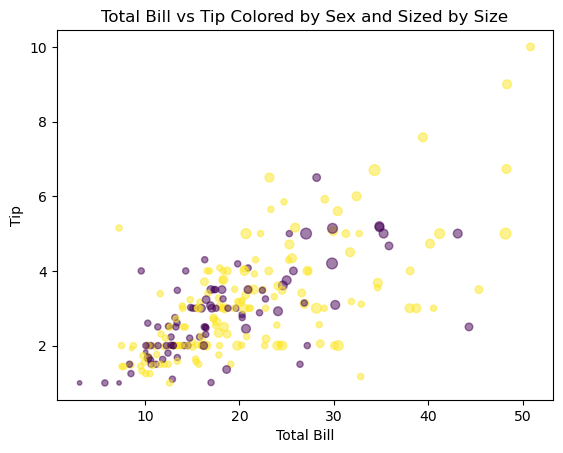

In [66]:
scatter_plot = plt.figure() 
axes1 = scatter_plot.add_subplot(1, 1, 1) 
axes1.scatter(
    x=tips['total_bill'], 
    y=tips['tip'],    
    s=tips['size'] * 10,    
    c=tips['sex_color'],
    alpha=0.5)

axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size') 
axes1.set_xlabel('Total Bill') 
axes1.set_ylabel('Tip') 

## 단변량 그래프 그리기 ― 히스토그램

eaborn 라이브러리의 tips 데이터 집합만 사용했지만 이번에는 seaborn 라이브러리 자체를 활용하여 그래프도 그려보자. seaborn 라이브러리를 활용하면 matplotlib보다 좀 더 화려한 그래프를 그릴 수 있다.

지금부터는 seaborn 라이브러 리를 sns라는 이름으로 줄여 사용하자. 다시 tips데이터 집합을 불러오자.

In [67]:
import seaborn as sns

tips = sns.load_dataset("tips")

seaborn 라이브러리로 히스토그램을 그리려면 subplots, distplot 메서드를 사용하면 된다. 먼저 subplots 메서드로 기본 틀을 만들고 distplot 메서드에 total_bill 열 데이터를 전달하면 히스토그램을 그릴 수 있다.

/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

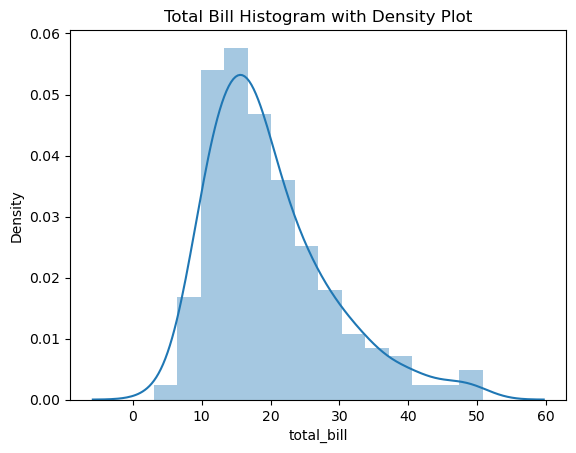

In [68]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill']) 
ax.set_title('Total Bill Histogram with Density Plot')

이때 distplot 메서드를 사용하면 히스토그램과 밀집도 그래프를 같이 그린다. 만약 밀집도 그래프를 제외하고 싶다면 kde 인잣값을 False로 설정하면 된다.

/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

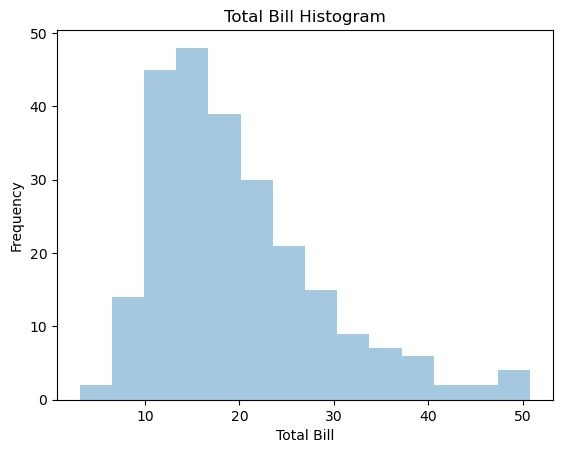

In [69]:
ax = plt.subplots() 
ax = sns.distplot(tips['total_bill'], kde=False) 
ax.set_title('Total Bill Histogram') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Frequency')

밀집도 그래프만 나타내려면 hist 인자를 False로 지정하면 된다.

/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Unit Probability')

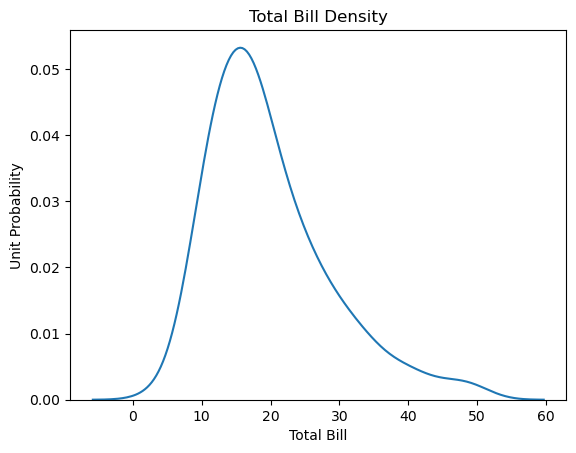

In [70]:
ax = plt.subplots() 
ax = sns.distplot(tips['total_bill'], hist=False) 
ax.set_title('Total Bill Density') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Unit Probability')

실무 환경에서는 데이터 시각화를 더 효율적으로 하기 위해 여러 그래프를 한번에 출력하는 경우가 많다. 다음은 히스토그램과 밀집도를 그리는 distplot 메서드에 rug인자를 추가하여 양탄자(rug) 그래프까지 그린 것이다.

/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Total Bill')

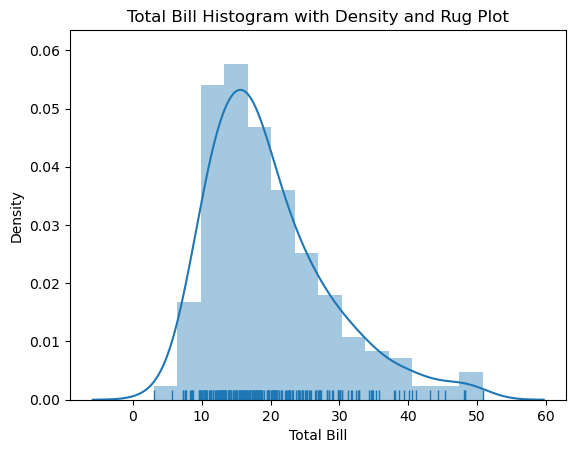

In [71]:
hist_den_rug, ax = plt.subplots() 
ax = sns.distplot(tips['total_bill'], rug=True) 
ax.set_title('Total Bill Histogram with Density and Rug Plot') 
ax.set_xlabel('Total Bill')

이번에는 히스토그램과 비슷하게 생긴 count 그래프를 그려보자. count 그래프는 이산값을 나타낸 그래프다. 다음은 countplot 메서드에 tips 데이 터프레 임의 day열 데이터를 넣어 count 그래프를 그린 것이다.

/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

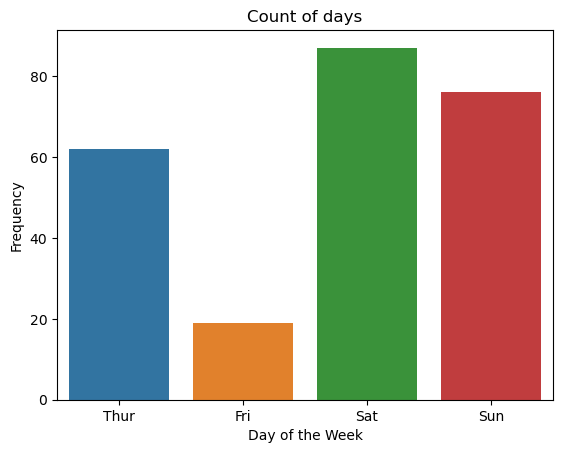

In [72]:
ax = plt.subplots() 
ax = sns.countplot('day', data=tips) 
ax.set_title('Count of days') 
ax.set_xlabel('Day of the Week') 
ax.set_ylabel('Frequency') 

## 다양한 종류의 이변량 그래프 그리기

### 1. seaborn 라이브러리로 산점도 그래프 그리기

seaborn 라이브러 리는 matplotlib 라이브러리보다 다양한 방법으로 산점도 그래프를 그릴 수 있다. 산점도 그래프를 그리려면 seaborn 라이브러리의 regplot 메서드를 사용해야 한다. regplot 메서드를 사용하면 산점도 그래프와 회귀선을 함께 그릴 수 있다. 만약 회귀선을 제거하려면 fit_reg 인자를 False로 지정하면 된다.

Text(0, 0.5, 'Tip')

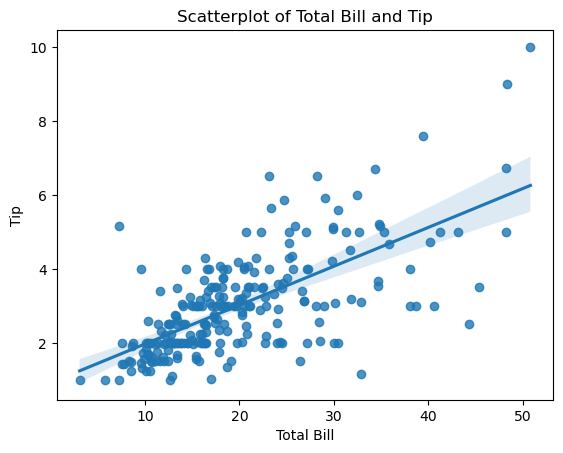

In [73]:
ax = plt.subplots() 
ax = sns.regplot(x='total_bill', y='tip', data=tips) 
ax.set_title('Scatterplot of Total Bill and Tip') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Tip') 

Text(0, 0.5, 'Tip')

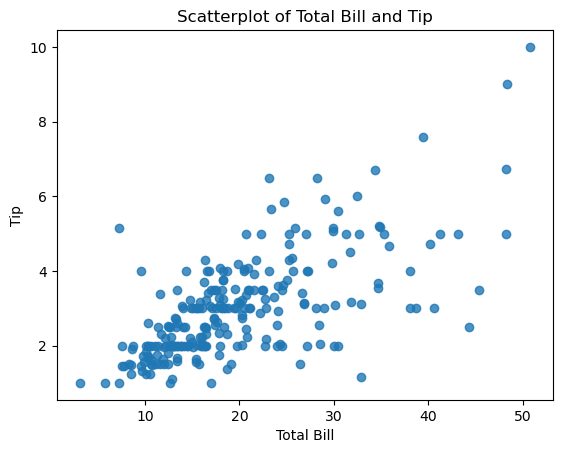

In [74]:
ax = plt.subplots() 
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False) 
ax.set_title('Scatterplot of Total Bill and Tip') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Tip') 

이번에는 산점도 그래프와 히스토그램을 한 번에 그려주는 jointplot 메서드를 사용해 보자. x, y 인자에 원하는 열 이름을 지정하고 data 인잣값으로 데이터프레임을 지정하면 그래프를 그릴 수 있다.

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

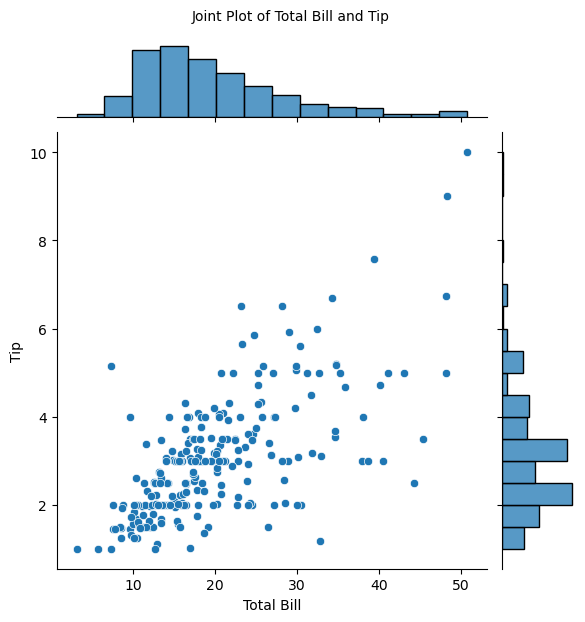

In [75]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips) 
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

산점도 그래프는 점이 겹쳐 보일 경우 점을 구분하기 어렵다는 단점이 있다. 만약 산점도 그래프의 데이터를 구분하기 쉽게 그리고 싶다면 육각 그래프(hexbin)를 사용하면 된다. 육각 그래프는 2차원 표면에 육각형으로 데이터를 쌓아 표현하는 그래프다. 그래서 특정 데이터의 개수가 많아지면 점점 진한 색으로 표현된다. 육각 그래프는 위 과정에서 사용한 jointplot 메서드를 그대로 사용한다. 대신 kind 인잣값을 hex로 지정하면 된다.

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

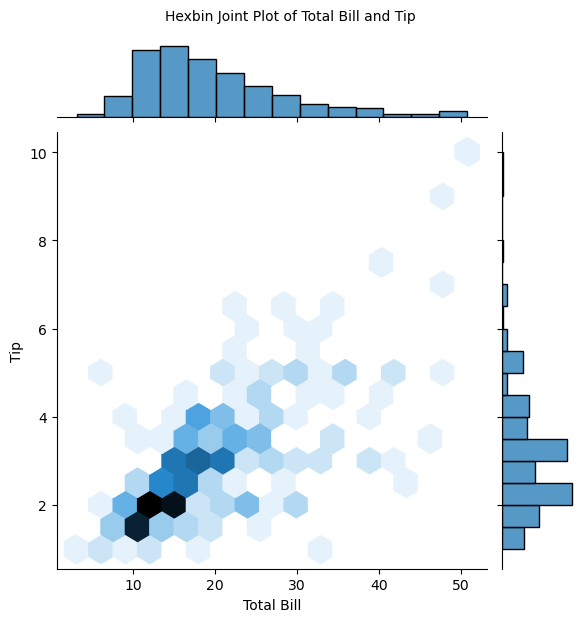

In [76]:
hexbin = sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex") 
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

### 4. 이차원 밀집도 그리기

이번에는 이차원 밀집도를 그려보자. 이차원 밀집도는 kdeplot 메서드로 만들 수 있다. 다음은 total_bill, tip열 데이터를 전달하여 이차원 밀집도를 그린 것이다. 이때 shade 인잣값을 True로 지정하면 그래프에 음영 효과를 줄 수 있다.

/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1681: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Tip')

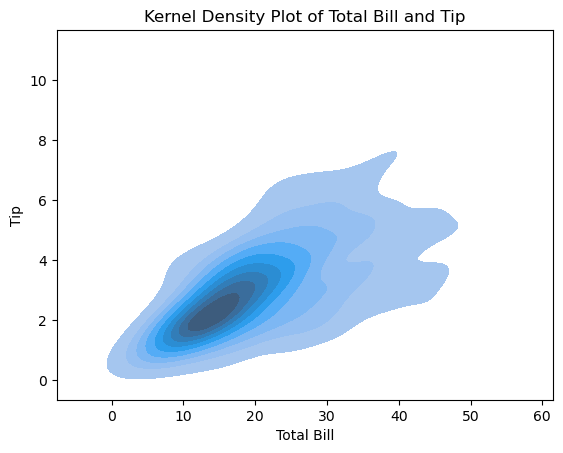

In [77]:
kde, ax = plt.subplots() 
ax = sns.kdeplot(data=tips['total_bill'],
                 data2=tips['tip'], 
                 shade=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Tip') 

### 5. 바 그래프 그리기

이번에는 바 그래프를 그려보자. 바 그래프는 지정한 변수의 평균을 계산하여 그릴수 있다. 다음은 시간에 따라 지불한 비용의 평균을 바 그래프로 나타낸 것이다.

Text(0, 0.5, 'Average total bill')

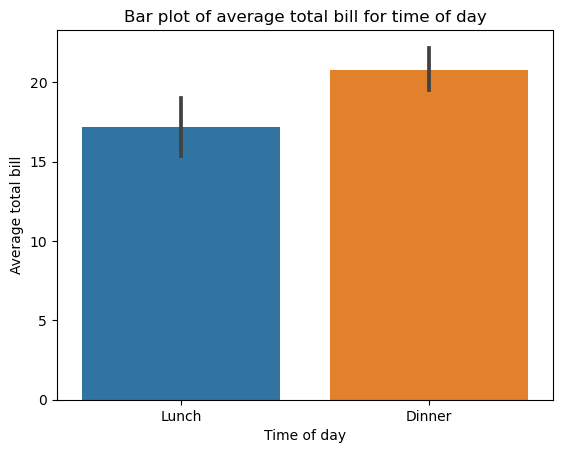

In [78]:
ax = plt.subplots() 
ax = sns.barplot(x='time', y='total_bill', data=tips) 
ax.set_title('Bar plot of average total bill for time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Average total bill')

### 6. 박스 그래프 그리기

박스 그래프도 그려보자. 박스 그래프는 최솟값, 1분위수, 중간값, 3분위수, 최댓값, 이상치 등 다양한 통계량을 한 번에 표현하는 그래프다.

Text(0, 0.5, 'Total Bill')

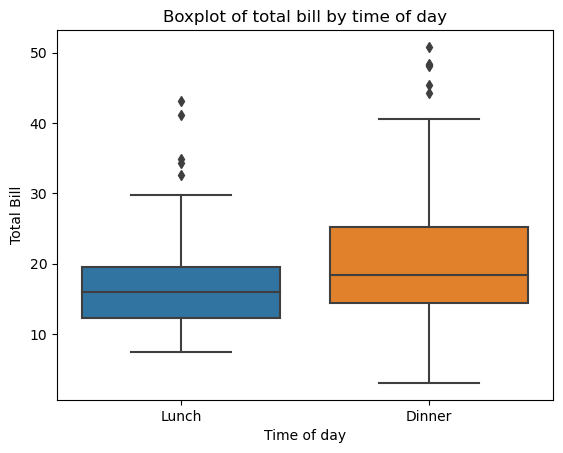

In [79]:
ax = plt.subplots() 
ax = sns.boxplot(x='time', y='total_bill', data=tips) 
ax.set_title('Boxplot of total bill by time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Total Bill') 

박스 그래프는 다양한 통계 수치를 확인하기 위해 자주 사용하는 그래프지만 데이터 분산이 모호하게 표현된다. 이런 경우에는 박스 그래프에 커널 밀도를 추정한 바이올린 그래프를 사용하면 된다. 쉽게 말해 위 과정의 박스 형태를 바이올린 형태로 바꾸면 바이올린 그래프가 된다. 바이올린 그래프는 violinplot 메서드를 사용하여 그릴 수 있다.

Text(0, 0.5, 'Total Bill')

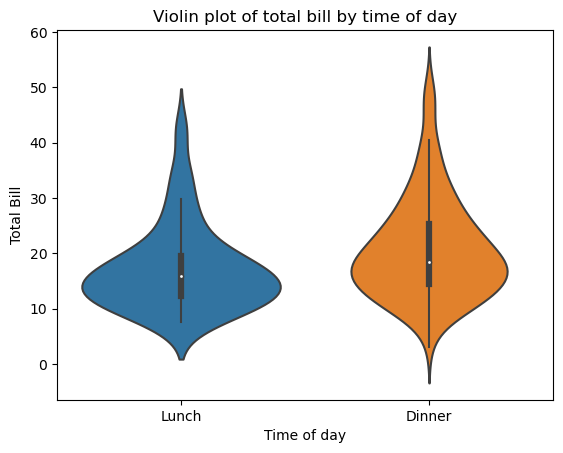

In [80]:
ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', data=tips) 
ax.set_title('Violin plot of total bill by time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Total Bill')

### 8. 관계 그래프 그리기

마지막으로 관계 그래프를 그려보자. 관계 그래프는 지금까지 설명한 그래프를 종합한 그래프라고 생각하면 된다. 관계 그래프는 pairplot 메서드에 데이터프레 임을 넣는 방법으로 간단하게 그릴 수 있다.

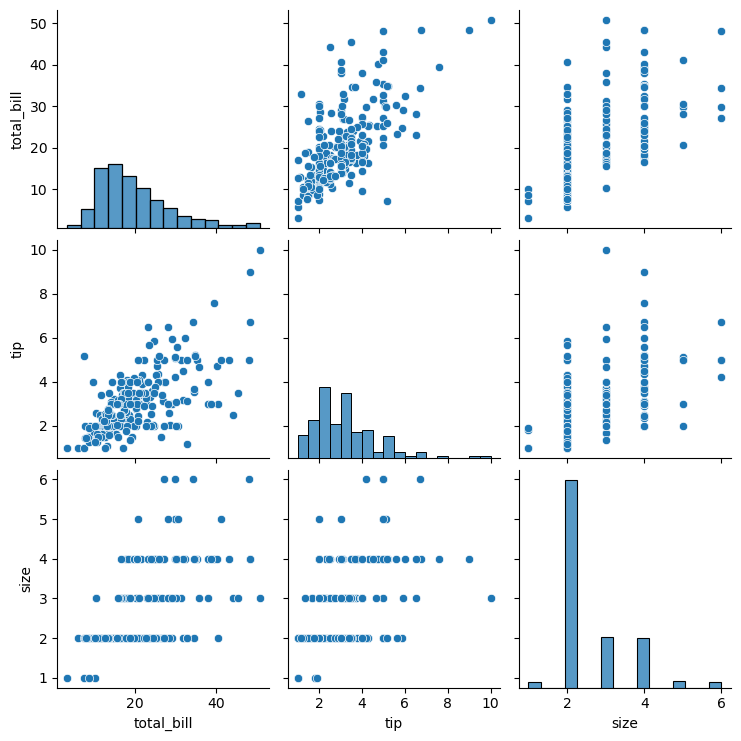

In [81]:
fig = sns.pairplot(tips)

이때 관계 그래프는 중복된 정보가 표현된다는 단점이 있다. 즉, 관계 그래프의 절반(대각선을 기준으로 위)은 나머지 절반(대각선을 기준으로 아래)과 같다. 이런 경우에는 중복된 그래프가 그려지는 위치를 직접 지정하여 원하는 그래프로 교체하면 된다. map_upper 메서드는 위 관계 그래프를 반으로 나눈 대각선을 기준으로 위쪽에 그릴 그래프를 지정한다. 반대로 mapjower 메서드는 대각선을 기준으로 아래쪽에 그릴 그래프를 지정한다. map_diag는 대각선을 중심으로 그래프를 그린다. 다음은 이차원 밀집도를 대각선 기준으로 아래 쪽에, 산점도 그래프는 대각선 기준으로 위쪽에 그린 것이다. 히스토그램과 밀집도는 대각선을 중심 으로 그려진다.

/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/pytho

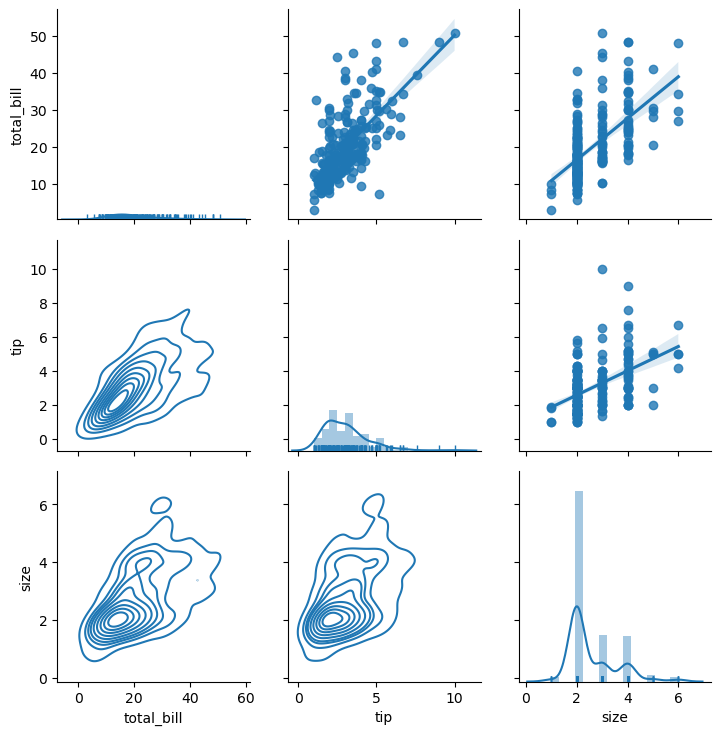

In [82]:
pair_grid = sns.PairGrid(tips) 
pair_grid = pair_grid.map_upper(sns.regplot) 
pair_grid = pair_grid.map_lower(sns.kdeplot) 
pair_grid = pair_grid.map_diag(sns.distplot, rug=True) 
plt.show()

## 다변량 그래프 그리기

### 1. seaborn 라이브러리로 바이올린 그래프 그리기 ― 색상 추가

먼저 바이올린 그래프를 그리되 그래프의 색상을 추가해보자. 색상을 추가하는 방법은 아주 간단하다. violinplot 메서드에 hue 인잣값으로 색상에 사용할 열 이름을 추가하면 된다.

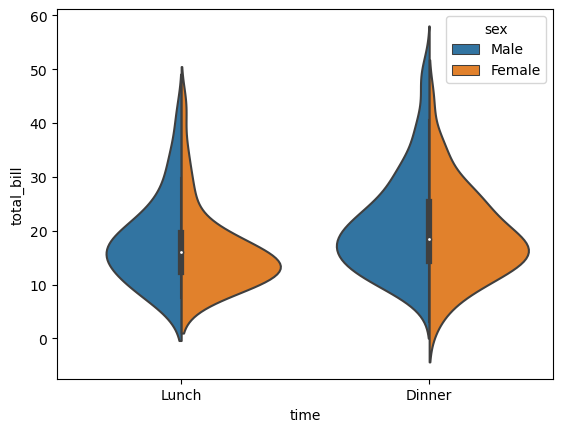

In [83]:
violin, ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True) 
plt.show()

### 2. 산점도, 관계 그래프 그리기 ― 색상 추가

산점도 그래프, 관계 그래프를 그리는 경우에도 마찬가지 방법으로 색상을 추가할 수 있다.

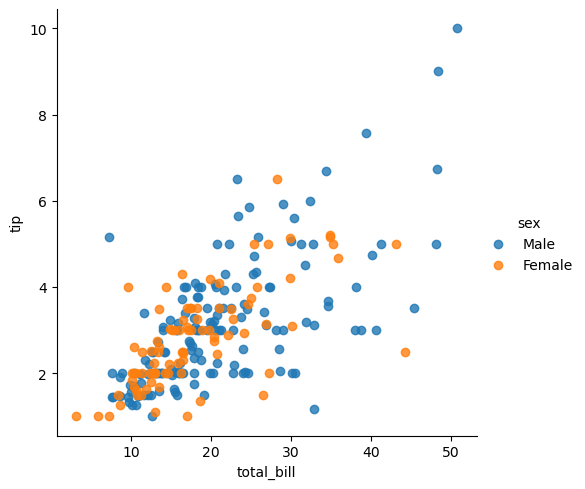

In [84]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False) 
plt.show()

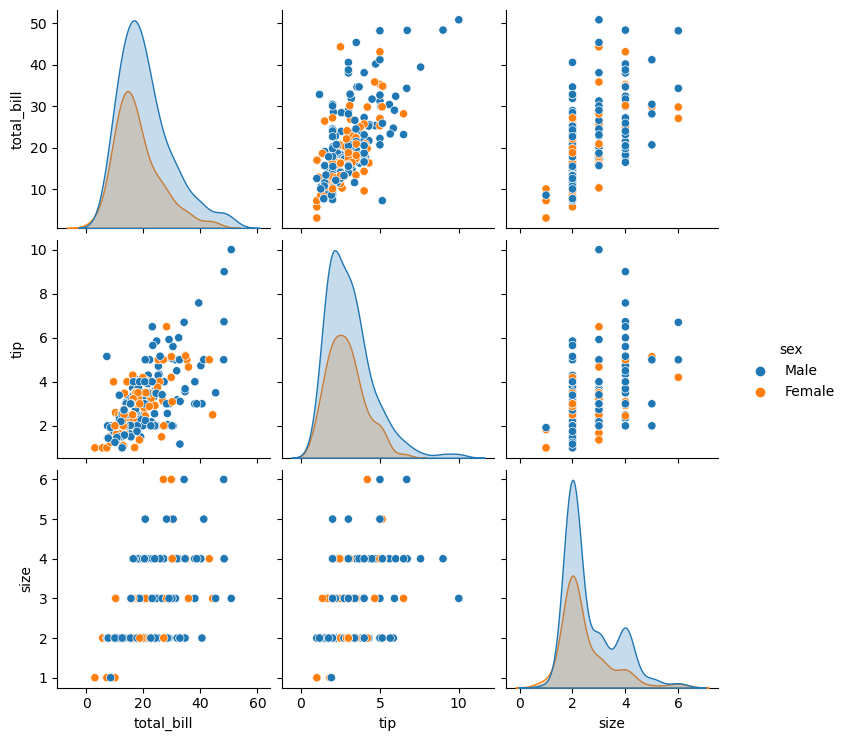

In [85]:
fig = sns.pairplot(tips, hue='sex')

### 3. 산점도 그래프의 크기와 모양 조절하기

이번에는 산점도 그래프의 크기와 모양을 조절해 보자. 다음은 산점도 그래프의 점 크기를 조절하여 표현한 것이다. 산점도 그래프의 점 크기를 조절하려면 scatter, kws에 딕셔너리 형태로 인잣값을 전달하면 된다. 여기서는 크기만 조절하기 위해 ’s’: tips['size1]를 딕셔너리에 담아 전달했다.

ValueError: s must be a scalar, or float array-like with the same size as x and y

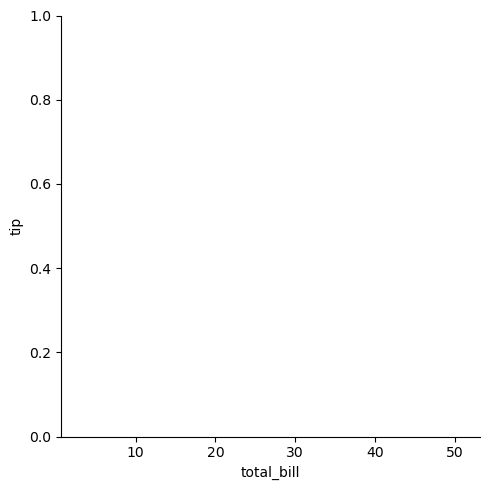

In [86]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex', scatter_kws={'s': tips['size']*10}) 
plt.show()

만약 산점도 그래프의 점을 다른 기호로 표현하고 싶다면 markers 인잣값에 표현하고자 하는 기호를 리스트에 담아 전달하면 된다.

ValueError: s must be a scalar, or float array-like with the same size as x and y

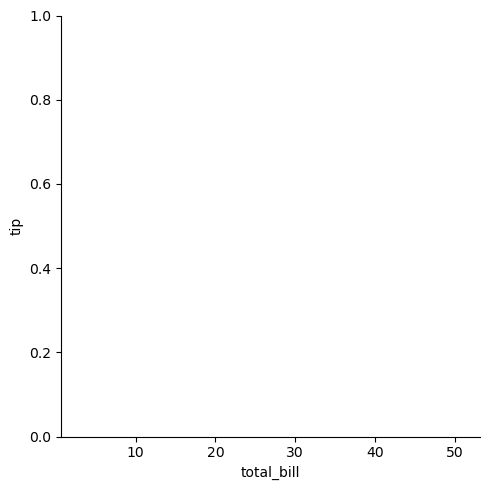

In [87]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex', markers=['o', 'x'], scatter_kws={'s': tips['size']*10}) 
plt.show()

### 5. lmplot 메서드로 4개의 데이터 그룹에 대한 그래프 한 번에 그리기

다음은 앤스콤 4분할 그래프를 Implot 메서드로 그린 것이다. x와 y 인자에는 앤스콤 데이터 집합의 x, y 열을 전달하고 data 인자에는 데이터프레임(anscombe)을 전달했다. 그런데 그래프를 자세히 살펴보면 4개의 데이터 그룹이 한꺼번에 산점도 그래프로 그려진 것을 알 수 있다. 그룹별로 그래프를 나누어 그리려면 어떻게 해야 할까?

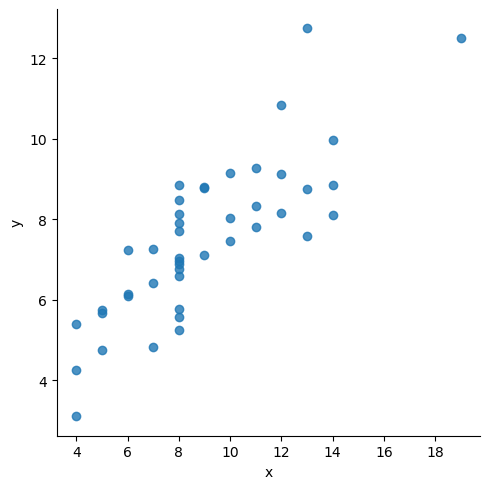

In [88]:
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False)

그룹별로 그래프를 나누어 그리려면 Implot 메서드에 추가로 col, col_warp 인자를 설정해야 한다. 다음은 Implot 메서드를 사용해 데이터 그룹별로 그래프를 그린 것이다. col_wrap 인자에는 그래프를 그릴 열의 최댓값을 지정하고 col 인자에는 데이터 그룹을 구분할 열(dataset)을 지정했다.

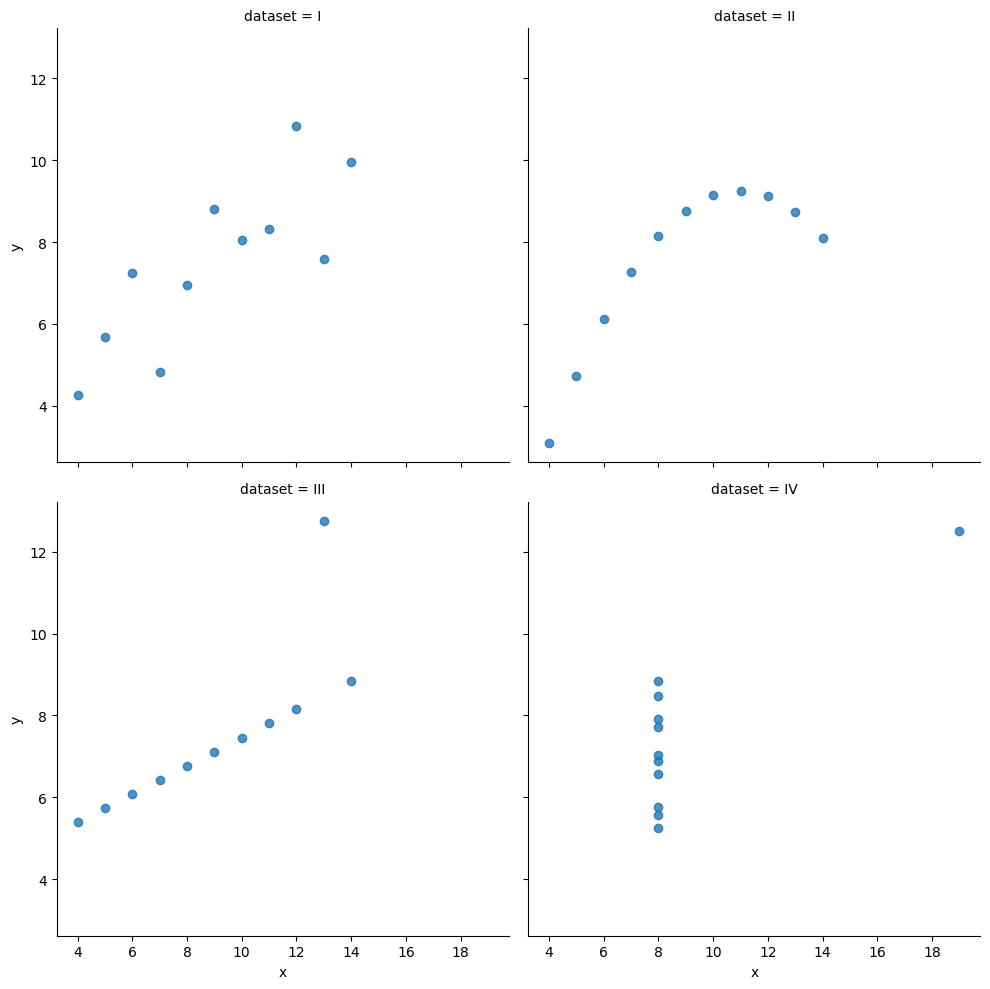

In [89]:
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False, col='dataset', col_wrap=2)

## FacetGrid 클래스로도 그룹별 그래프를 그릴 수 있다

만약 Implot 메서드를 사용하는 방법이 복잡하게 느껴진다면 FacetGrid 클래스를 사용하여 간편하게 그래프를 그릴 수도 있다. 이번에는 tips 데이터 집합을 사용하여 그래프를 그려보자.

1. 먼저 FacetGrid에 데이터프레임과 그룹을 구분할 열 이름을 전달하여 객체를 생성한다. 그런 다음 객체(facet)의 map 메서드에 그래프의 종류(distplot)와 소축으로 지정할 열 이름을 순서대로 전달하면 히스토그램, 밀집도, 양탄자 그래프를 그릴 수 있다.


/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/pytho

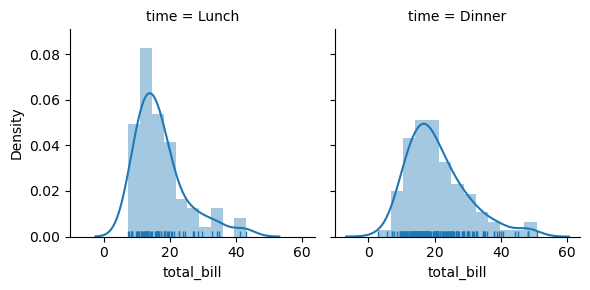

In [90]:
facet = sns.FacetGrid(tips, col='time') 
facet.map(sns.distplot, 'total_bill', rug=True) 

2. 다변량 그래프도 그려보자. 다음은 tips 데이터 집합의 day 열로 그룹을 구분하여 그래프를 그린 것이다.

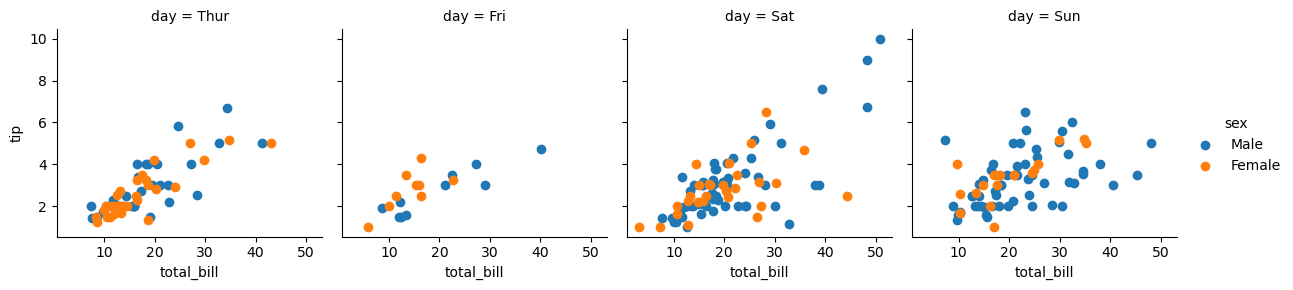

In [42]:
facet = sns.FacetGrid(tips, col='day', hue='sex') 
facet = facet.map(plt.scatter, 'total_bill', 'tip') 
facet = facet.add_legend() 

3. 이번에는 더 많은 변수를 사용하여 그래프를 그려보자. 다음은 time, smoker 열을 사용하여 산점도 그래프를 그린 것이다. time, smoker 열은 각각 2개의 값을 가지고 있다.(Dinner / Lunch, Yes / No) 따라서 2행 2열의 격자가 만들어진다.

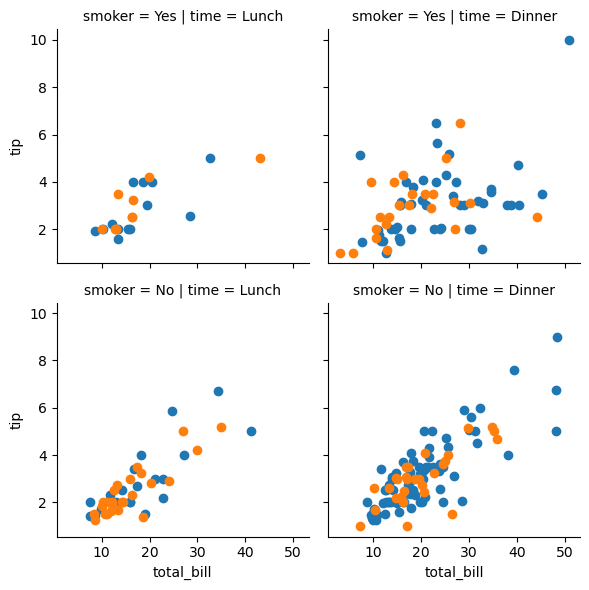

In [91]:
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex') 
facet.map(plt.scatter, 'total_bill', 'tip') 

## 데이터프레임과 시리즈로 그래프 그리기

데이터프레임과 시리즈로도 그래프를 그릴 수 있다. 간편하게 그래프를 그리고 싶은 경우에는 데이터프레임이나 시리즈를 사용하여 바로 그래프를 그릴 수 있다.
우선 히스토그램을 그려보자. 시리즈에 있는 plot 속성에 정의된 hist 메서드를 사용하면 해당 시리즈의 값을 이용하여 히스토그램을 바로 그릴 수 있다.

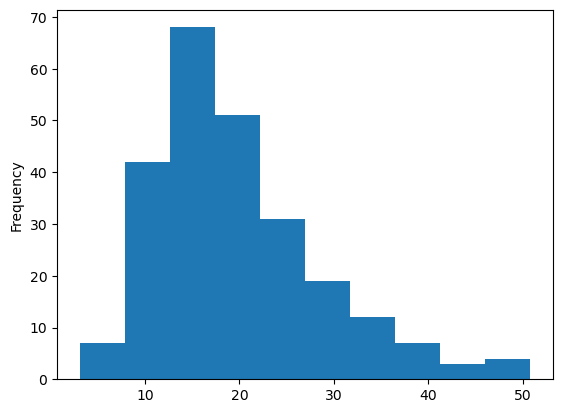

In [44]:
fig, ax = plt.subplots()
ax = tips['total_bill'].plot.hist() 

투명도를 조절하려면 hist 메서드의 alpha, bins, ax 인자를 사용하면 된다. 다음은 tips 데이터프레임에서 2개의 시리즈를 선택하여 히스토그램을 그린 것이다.

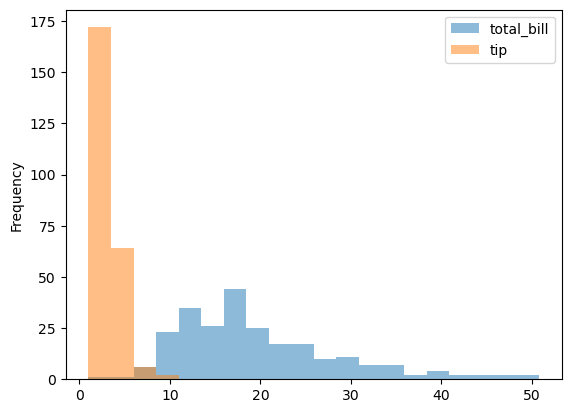

In [92]:
fig, ax = plt.subplots() 
ax = tips[['total_bill', 'tip']].plot.hist(alpha=0.5, bins=20, ax=ax) 

밀집도, 산점도 그래프, 육각 그래프는 각각 kde, scatter, hexbin 메서드를 사용하여 그릴 수 있다.

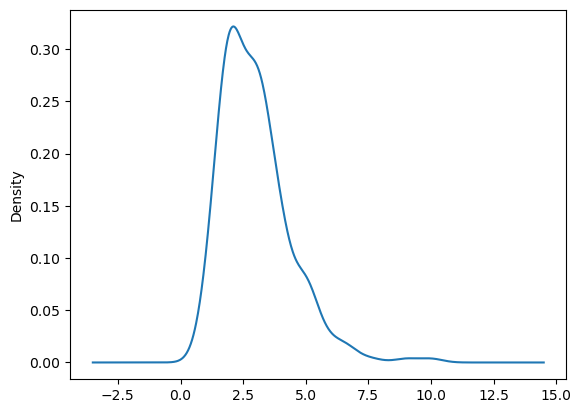

In [94]:
fig, ax = plt.subplots() 
ax = tips['tip'].plot.kde() 

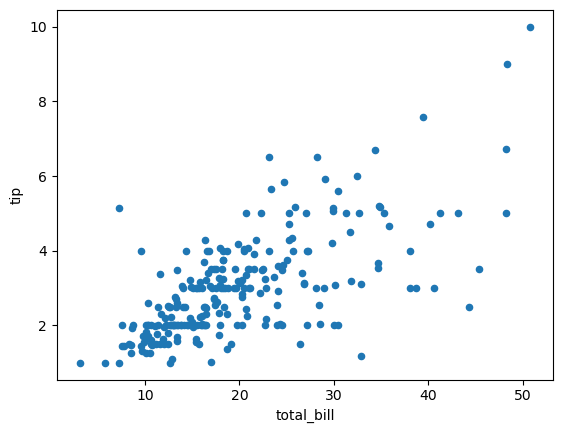

In [95]:
fig, ax = plt.subplots() 
ax = tips.plot.scatter(x='total_bill', y='tip', ax=ax) 

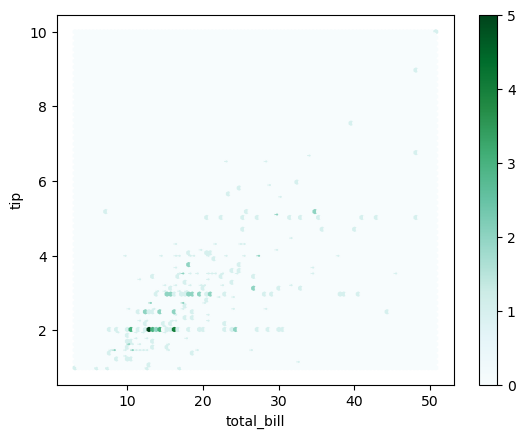

In [96]:
fig, ax = plt.subplots() 
ax = tips.plot.hexbin(x='total_bill', y='tip', ax=ax) 

이때 육각 그래프의 육각형 크기는 gridsize 인자를 사용하여 변경할 수 있다.

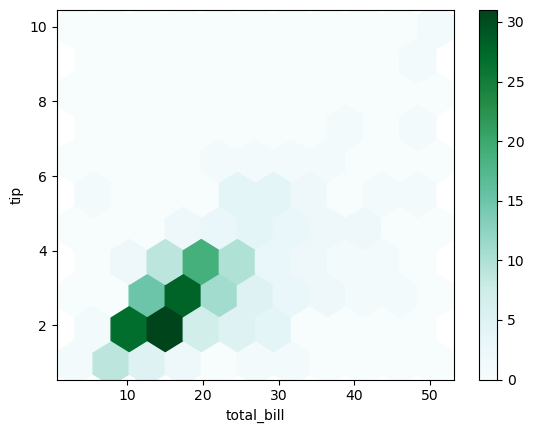

In [97]:
fig, ax = plt.subplots() 
ax = tips.plot.hexbin(x='total_bill', y='tip', gridsize=10, ax=ax) 

다음은 box 메서드를 사용하여 그린 박스 그래프다.

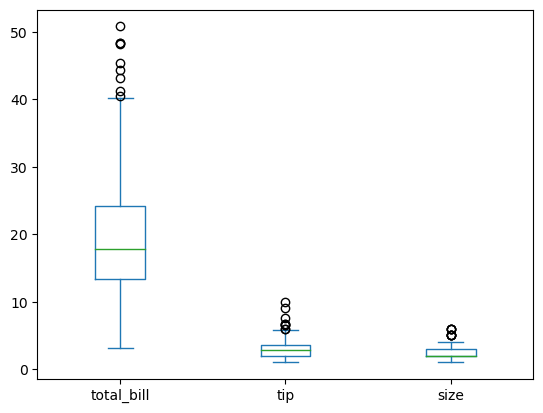

In [98]:
fig, ax = plt.subplots() 
ax = tips.plot.box(ax=ax) 

## 그래프에 스타일 적용하기

seaborn 라이브러리로 만든 그래프는 모두 기본 스타일이었다. seaborn 라이브러리로 만든 그래프의 스타일은 set_style 메서드를 사용하여 바꿀 수 있다. set_style은 스타일을 적용할 부분에서 한번만 실행하면 된다. 그러면 메서드를 실행한 이후의 그래프가 모두 지정한 스타일로 바뀐다.

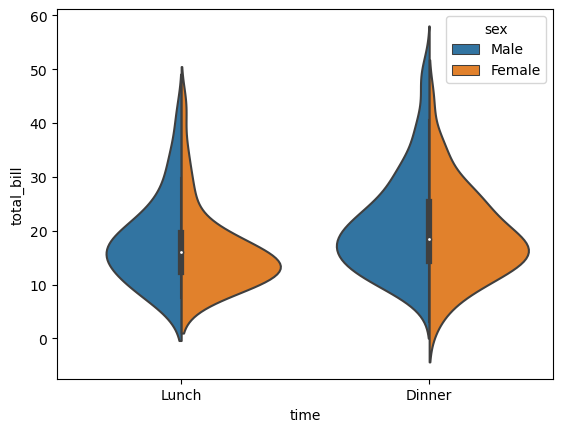

In [99]:
fig, ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True) 

whitegrid로 스타일을 설정하여 그래프를 그리면 어떻게 될까? 그래프의 배경에 가로줄이 생긴다.

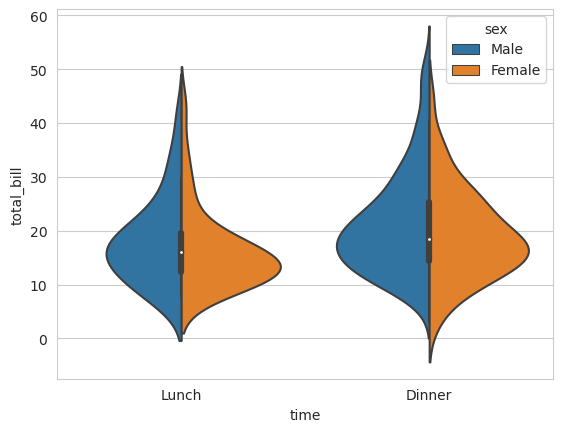

In [100]:
sns.set_style('whitegrid') 
fig, ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True) 

다음은 for문을 이용하여 모든 스타일을 하나씩 적용한 그래프다.

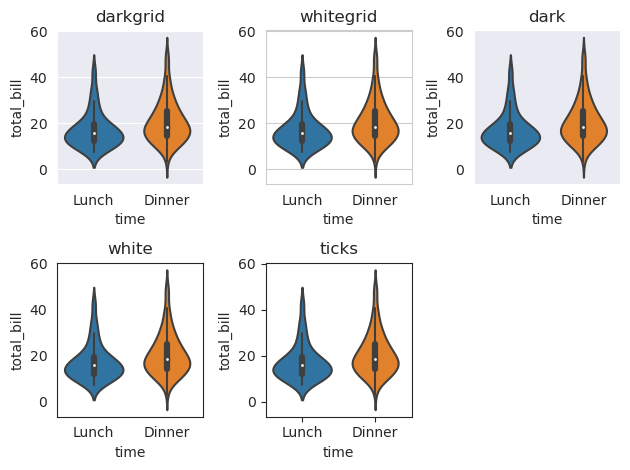

In [101]:
fig = plt.figure() 
seaborn_styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks'] 
for idx, style in enumerate(seaborn_styles):
    plot_position = idx + 1
    with sns.axes_style(style):
        ax = fig.add_subplot(2, 3, plot_position)
        violin = sns.violinplot(x='time', y='total_bill', data=tips, ax=ax)
        violin.set_title(style) 
        
fig.tight_layout() 